In [23]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
# Load the dataset
data = pd.read_csv('Cinderella_II_Dataset.csv')
data.head()

,engine_fuel_rate,accum_fuel_leg,engine_rpm,accelPedalPos,latitude,longitude,speedOverGround,courseOverGroundTrue,speedApparent,heading_magnetic,...,distanceToPreviousDock,delta_distance,accumDistLeg,Timestamp,accum_time_leg,sailing_state,closest_dock,segment_state,leg,RT_id
0,82.000000,0.013583,1326.416667,0.106413,59.401617,18.355397,0.448467,171.7957,4.662587,167.3953,...,17.744368,0.192010,0.375416,2022-07-01 08:54:52,0.60,un_specified,vaxholm,docking,vaxholm-sodra,0.0
1,101.333333,0.036750,1340.500000,0.131053,59.401609,18.355403,0.589003,171.7957,4.363132,167.3953,...,18.369153,0.228877,1.025822,2022-07-01 08:54:53,1.50,un_specified,vaxholm,docking,vaxholm-sodra,0.0
2,114.500000,0.069500,1379.500000,0.146299,59.401597,18.355410,0.742814,171.7957,4.006906,167.3953,...,19.411825,0.274332,1.930372,2022-07-01 08:54:54,2.55,un_specified,vaxholm,docking,vaxholm-sodra,0.0
3,120.000000,0.103833,1423.166667,0.152447,59.401582,18.355416,0.900456,171.7957,4.046811,167.3953,...,20.731121,0.331778,3.011387,2022-07-01 08:54:55,3.60,un_specified,vaxholm,docking,vaxholm-sodra,0.0
4,122.000000,0.134333,1423.083333,0.158249,59.401569,18.355422,1.056645,171.7957,4.165147,167.3953,...,21.983082,0.388637,4.119830,2022-07-01 08:54:56,4.50,un_specified,vaxholm,docking,vaxholm-sodra,0.0


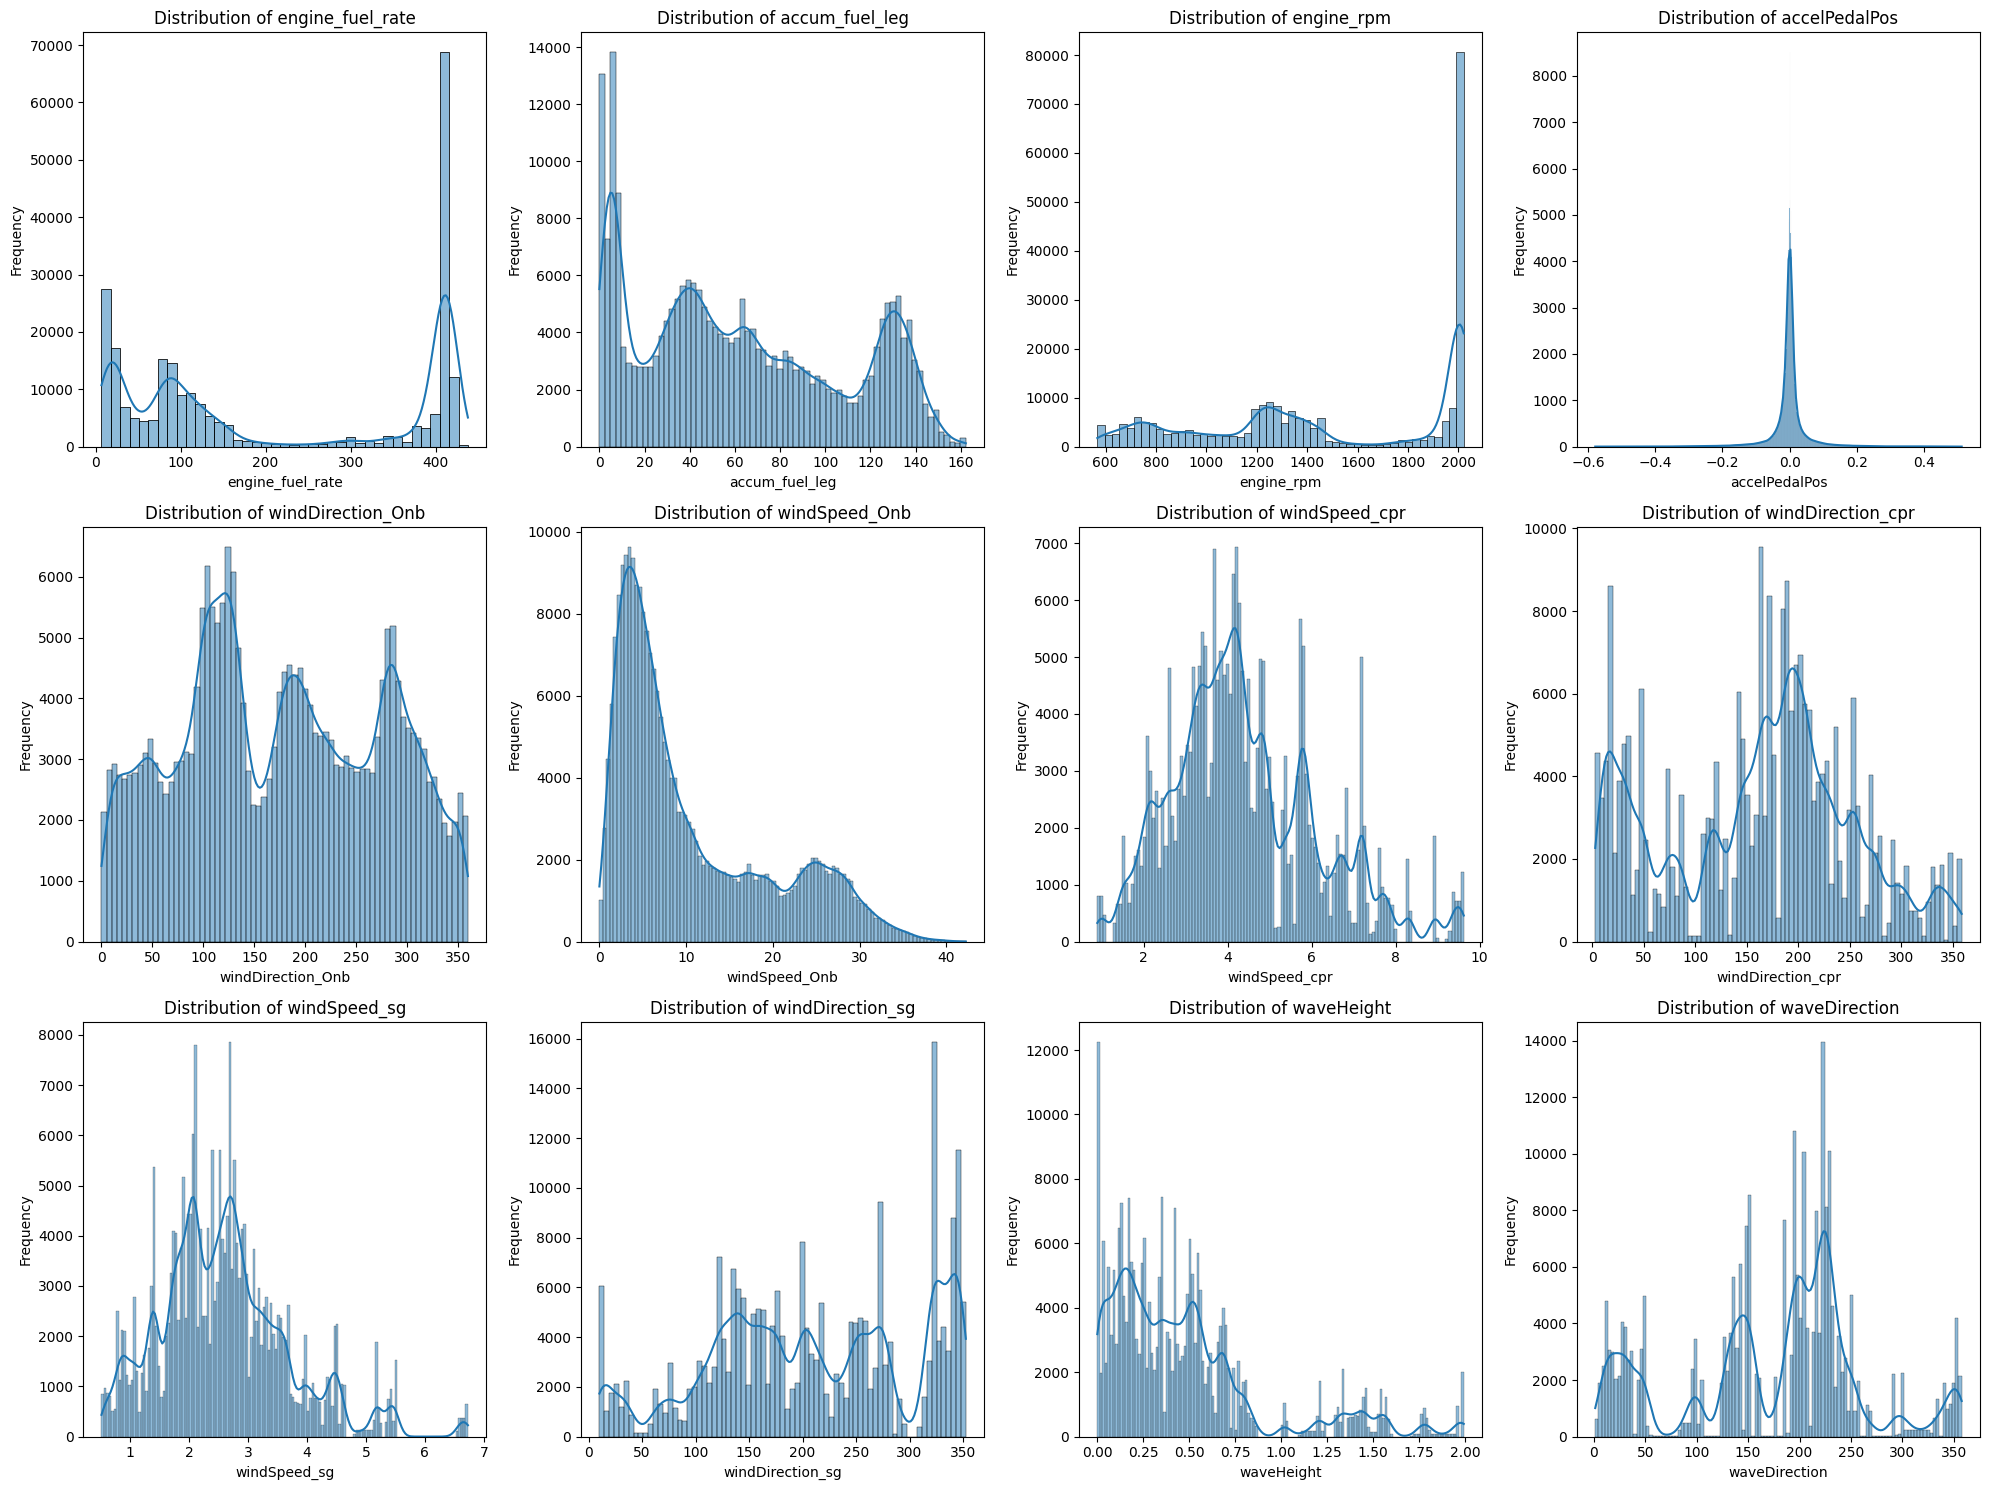

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

# List of engine's fuel variables
engine_fuel_variables = ['engine_fuel_rate', 'accum_fuel_leg', 'engine_rpm', 'accelPedalPos']

# List of key weather variables
weather_variables = ['windDirection_Onb', 'windSpeed_Onb', 'windSpeed_cpr', 'windDirection_cpr',
                     'windSpeed_sg', 'windDirection_sg', 'waveHeight', 'waveDirection']

# Plot distribution of engine's fuel variables
for i, var in enumerate(engine_fuel_variables):
    sns.histplot(data[var], ax=axs[0, i], kde=True)
    axs[0, i].set_title(f'Distribution of {var}')
    axs[0, i].set_ylabel('Frequency')

# Plot distribution of key weather variables
for i, var in enumerate(weather_variables):
    sns.histplot(data[var], ax=axs[1 + i // 4, i % 4], kde=True)
    axs[1 + i // 4, i % 4].set_title(f'Distribution of {var}')
    axs[1 + i // 4, i % 4].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [25]:
# Calculate mean and standard deviation of the "engine_fuel_rate" column
mean_fuel_rate = data["engine_fuel_rate"].mean()
std_fuel_rate = data["engine_fuel_rate"].std()

In [26]:
# Convert the 'Timestamp' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Set the 'Timestamp' column as the index
data.set_index('Timestamp', inplace=True)

In [27]:
# Resample and aggregate the relevant columns on 1 minute
minute_data = data[['engine_fuel_rate', 'windDirection_Onb', 'windSpeed_Onb', 'speedOverGround', 'speedApparent', 'waveHeight', 'currentSpeed', 'course_heading_diff', "windDirection_cpr", "windSpeed_cpr", "windSpeed_sg", "windDirection_sg", "heading_magnetic", "RT_id"]].resample('1T').mean().fillna(method='ffill')
minute_data.head()

,engine_fuel_rate,windDirection_Onb,windSpeed_Onb,speedOverGround,speedApparent,waveHeight,currentSpeed,course_heading_diff,windDirection_cpr,windSpeed_cpr,windSpeed_sg,windDirection_sg,heading_magnetic,RT_id
Timestamp,,,,,,,,,,,,,,
2022-07-01 08:54:00,114.187500,151.263944,5.108177,1.003508,4.210225,1.240493,0.049154,-1.803785,150.832596,6.768450,3.776125,175.407917,167.3953,0.0
2022-07-01 08:55:00,50.954167,189.573235,4.740528,1.442286,4.082713,1.240546,0.049249,-1.803785,150.821211,6.772324,3.767625,175.474028,167.3953,0.0
2022-07-01 08:56:00,26.983333,248.519915,4.926118,3.378509,5.251950,1.240640,0.049415,-1.803785,150.801124,6.779159,3.752625,175.590694,167.3953,0.0
2022-07-01 08:57:00,64.006944,209.009992,7.990278,4.856032,5.376256,1.240734,0.049582,-1.803785,150.781037,6.785994,3.737625,175.707361,167.3953,0.0
2022-07-01 08:58:00,96.461111,222.140363,11.916174,6.805091,9.209285,1.240827,0.049749,-1.803785,150.760950,6.792830,3.722625,175.824028,167.3953,0.0


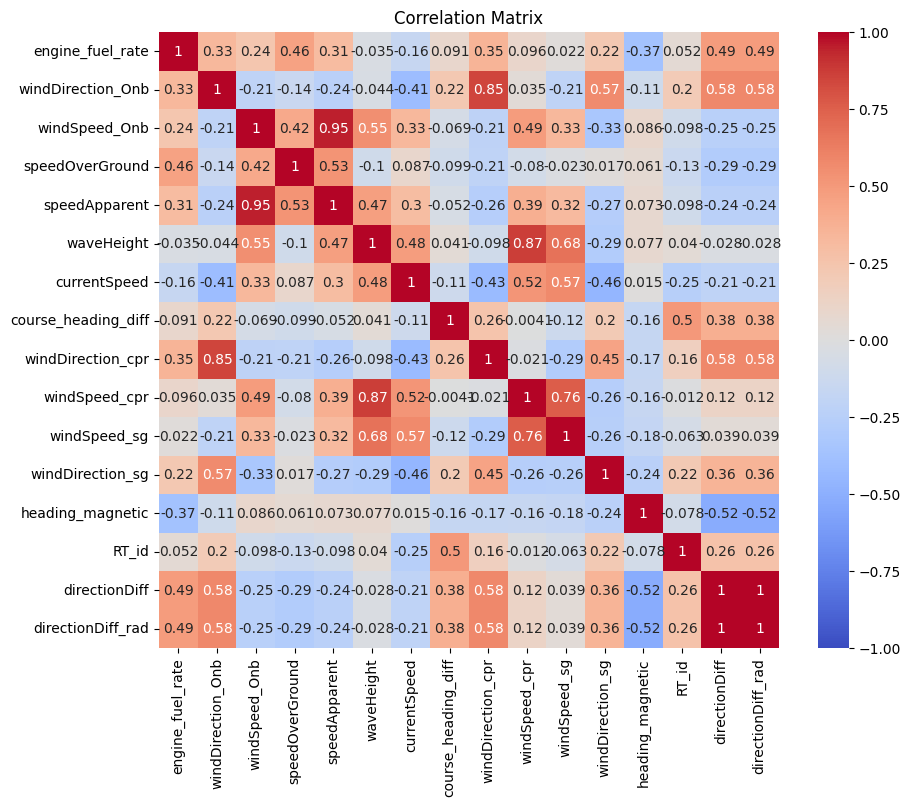

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
# Compute the correlation matrix
corr_matrix = minute_data.corr(method ='pearson')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [29]:
def plot_features_vs_color(data, x_feature, y_feature, color_feature):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(data[x_feature], data[y_feature], c=data[color_feature], cmap='seismic')
    plt.colorbar(scatter, label=color_feature)
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f'Scatter plot of {x_feature} and {y_feature} colored by {color_feature}')
    plt.show()

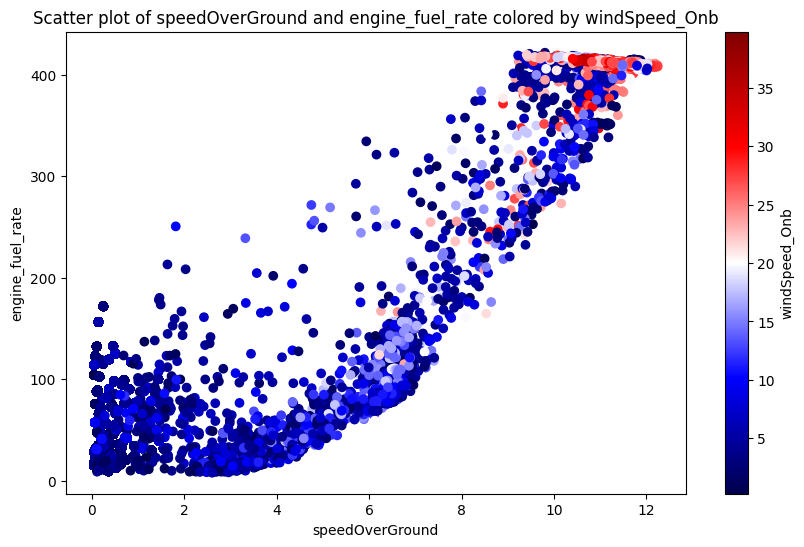

In [30]:
plot_features_vs_color(minute_data, 'speedOverGround', 'engine_fuel_rate', 'windSpeed_Onb')

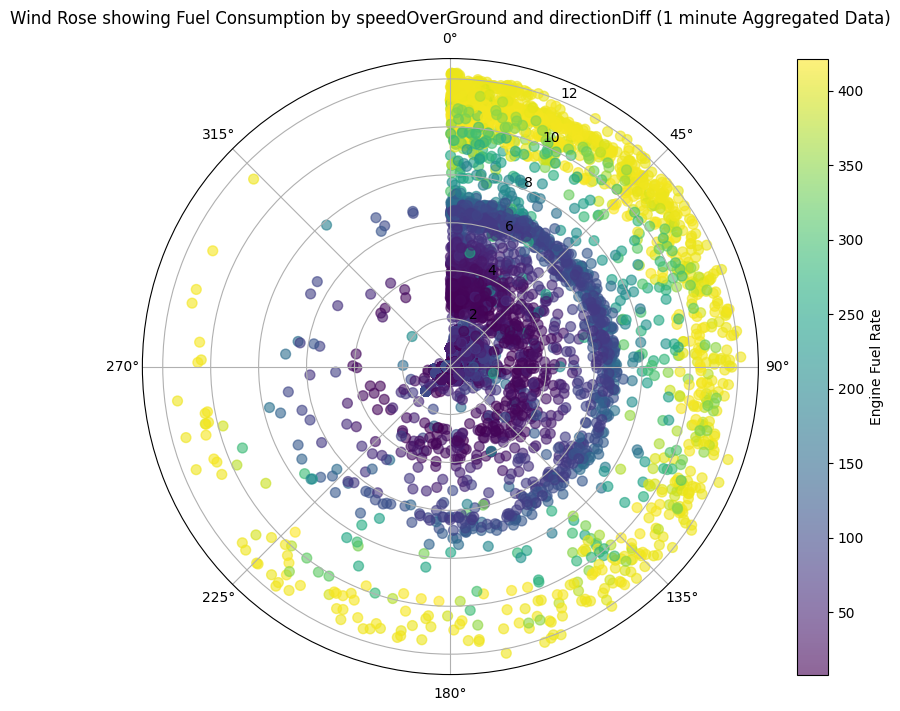

In [31]:
import numpy as np

minute_data["directionDiff"] = abs(minute_data["heading_magnetic"] - minute_data["windDirection_Onb"])

# Convert wind direction from degrees to radians for the polar plot
minute_data['directionDiff_rad'] = np.radians(minute_data['directionDiff'])

# Create a polar plot (wind rose)
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='polar')
sc = ax.scatter(minute_data['directionDiff_rad'], minute_data['speedOverGround'], 
                c=minute_data['engine_fuel_rate'], alpha=0.6, s=50, cmap='viridis')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.colorbar(sc, label='Engine Fuel Rate', orientation='vertical')
ax.set_title("Wind Rose showing Fuel Consumption by speedOverGround and directionDiff (1 minute Aggregated Data)")
plt.show()

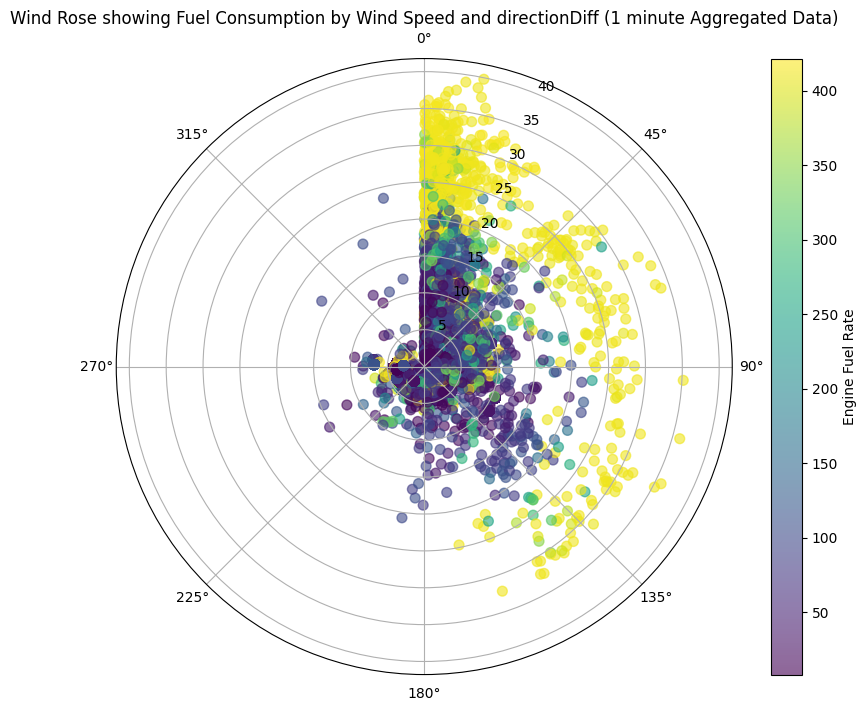

In [32]:
# Create a polar plot (wind rose)
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='polar')
sc = ax.scatter(minute_data['directionDiff_rad'], minute_data['windSpeed_Onb'], 
                c=minute_data['engine_fuel_rate'], alpha=0.6, s=50, cmap='viridis')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.colorbar(sc, label='Engine Fuel Rate', orientation='vertical')
ax.set_title("Wind Rose showing Fuel Consumption by Wind Speed and directionDiff (1 minute Aggregated Data)")
plt.show()

## Conclusion

From our analysis using the correlation matrix, we identified that among the various weather features, the wind speed and direction onboard exhibited the strongest correlation with the engine fuel rate. To validate these findings, we plotted the vessel speed against the engine fuel rate, factoring in the onboard wind speed. The resultant graph reinforced our initial observations.

To delve deeper into the influence of wind direction, we introduced a novel feature representing relative wind, which amalgamates wind direction with vessel heading. Consistent with our prior findings, the visualizations illustrated a clear pattern: as wind speed amplifies, there's a corresponding surge in the engine fuel rate.